In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline 

In [2]:
#import text files as dataframes and added column names based on readme

meta_df = pd.read_csv('./Data/YelpNYC/metadata',delimiter = '\t', 
                     names = ['user_id','prod_id','rating','target','date']
                     )

review_df = pd.read_csv('./Data/YelpNYC/reviewContent',delimiter = '\t',
                        names = ['user_id','prod_id','date','review']
                       )

prod_df = pd.read_csv('./Data/YelpNYC/productIdMapping',delimiter = '\t',
                     names = ['name','prod_id']
                     )

prod_df = pd.read_csv('./Data/YelpNYC/productIdMapping',delimiter = '\t',
                     names = ['name','prod_id']
                     )



In [3]:
#checking the contents of the metafile
meta_df.head()

,user_id,prod_id,rating,target,date
0,923,0,3.0,-1,2014-12-08
1,924,0,3.0,-1,2013-05-16
2,925,0,4.0,-1,2013-07-01
3,926,0,4.0,-1,2011-07-28
4,927,0,4.0,-1,2010-11-01


##### Taking a look at the meta_df we notice that there are 359,052 rows. There are int, float, and string types.

In [4]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359052 entries, 0 to 359051
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  359052 non-null  int64  
 1   prod_id  359052 non-null  int64  
 2   rating   359052 non-null  float64
 3   target   359052 non-null  int64  
 4   date     359052 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 13.7+ MB


In [5]:
#check for any missing values
meta_df.isna().sum()

user_id    0
prod_id    0
rating     0
target     0
date       0
dtype: int64

In [6]:
review_df.head()

,user_id,prod_id,date,review
0,923,0,2014-12-08,The food at snack is a selection of popular Gr...
1,924,0,2013-05-16,This little place in Soho is wonderful. I had ...
2,925,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,926,0,2011-07-28,This is a beautiful quaint little restaurant o...
4,927,0,2010-11-01,Snack is great place for a casual sit down lu...


##### There are 358,957 reviews in the review_df which is less than the rows in the metafile. This means that there are some information present within the metafile with no reviews related to it.

In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358957 entries, 0 to 358956
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  358957 non-null  int64 
 1   prod_id  358957 non-null  int64 
 2   date     358957 non-null  object
 3   review   358957 non-null  object
dtypes: int64(2), object(2)
memory usage: 11.0+ MB


##### Here we take a look at another dataframe. This one contains the the prod_id with the names of the 923 unique restaurants.

In [8]:
prod_df.head()

,name,prod_id
0,Snack,0
1,Peppino’s,1
2,Dekalb Restaurant,3
3,Le Parisien,4
4,Blue Spoon Coffee,5


In [9]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     923 non-null    object
 1   prod_id  923 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.5+ KB


##### We merge the two dataframes and create a new one that contains the review and their target. We want to ensure that the proper review is matched with the correct person so we use user_id, prod_id, and date columns. By checking the info of the for the new merged data we can see how many entries we have remaining. We should expect that it should match the review_df size. Any data that has no corresponding value in the meta file will not be used.

In [10]:
#merge the metafile and reviews together on user_id, prod_id, amd date. 
merged_df = meta_df.merge(review_df,
                         how = 'inner',
                         left_on = ['user_id','prod_id','date'],
                         right_on = ['user_id','prod_id','date']
                         )

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358957 entries, 0 to 358956
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  358957 non-null  int64  
 1   prod_id  358957 non-null  int64  
 2   rating   358957 non-null  float64
 3   target   358957 non-null  int64  
 4   date     358957 non-null  object 
 5   review   358957 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.2+ MB


##### To check if we lost any of our reviews we want to take a look at the unique reviews before and after the merge. We see that the values match and no review overwrote one another.

In [12]:
print('length of review_df: ',len(review_df['review'].unique()))
print('length of merged_df: ',len(merged_df['review'].unique()))

length of review_df:  358080
length of merged_df:  358080


In [13]:
merged_df.head()

,user_id,prod_id,rating,target,date,review
0,923,0,3.0,-1,2014-12-08,The food at snack is a selection of popular Gr...
1,924,0,3.0,-1,2013-05-16,This little place in Soho is wonderful. I had ...
2,925,0,4.0,-1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,926,0,4.0,-1,2011-07-28,This is a beautiful quaint little restaurant o...
4,927,0,4.0,-1,2010-11-01,Snack is great place for a casual sit down lu...


##### Here we take a look at the the duplicates in the review section of the dataframe. We will leave these in the dataset as these could be from different users and only consists of a small amount. Odd texts will be delt with later.

In [14]:

merged_df.loc[merged_df['review'].duplicated(),:].sort_values(by='review')

,user_id,prod_id,rating,target,date,review
248148,126032,652,5.0,1,2014-09-16,!
62965,30044,165,4.0,1,2011-06-27,"* For a second, just forget about the greek fi..."
330622,119630,872,2.0,1,2010-11-15,-
230112,119630,603,5.0,1,2010-11-15,-
105697,66546,296,4.0,-1,2014-11-06,.
...,...,...,...,...,...,...
260251,8387,672,4.0,-1,2014-08-09,yumm
208201,110882,555,5.0,-1,2014-06-11,yummy
200966,95275,542,5.0,-1,2014-08-20,yummy
114235,64792,331,4.0,1,2014-05-02,yummy!


##### The duplicates contain a small sample compared to the dataset but it does contain a higher rate of fraud reviews.

In [15]:
df_test = merged_df.loc[merged_df['review'].duplicated(),:]

df_test['target'].value_counts()

 1    569
-1    308
Name: target, dtype: int64

##### Taking a look at the data for our target, we see that our data is imbalanced with nearly most of the reviews being true. The false statements are changed to to 0 instead of -1 which will be used later on.

In [16]:
merged_df['target'].value_counts(normalize = True)

 1    0.897314
-1    0.102686
Name: target, dtype: float64

In [17]:
merged_df['target'] = np.where(merged_df['target'] == -1,
                             0, 
                             merged_df['target'])

In [18]:
merged_df['target'].value_counts(normalize = True)

1    0.897314
0    0.102686
Name: target, dtype: float64

##### Here we create a new dataframe which combines the merged dataframe and prod_df which includes the name of the restaurants

In [19]:
restaurants_df = merged_df.merge(prod_df,
                         how = 'inner',
                         left_on = ['prod_id'],
                         right_on = ['prod_id']
                        )

In [20]:
restaurants_df.head(15)

,user_id,prod_id,rating,target,date,review,name
0,923,0,3.0,0,2014-12-08,The food at snack is a selection of popular Gr...,Snack
1,924,0,3.0,0,2013-05-16,This little place in Soho is wonderful. I had ...,Snack
2,925,0,4.0,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,Snack
3,926,0,4.0,0,2011-07-28,This is a beautiful quaint little restaurant o...,Snack
4,927,0,4.0,0,2010-11-01,Snack is great place for a casual sit down lu...,Snack
5,928,0,4.0,0,2009-09-02,A solid 4 stars for this greek food spot. If ...,Snack
6,929,0,4.0,0,2009-08-25,Let me start with a shout-out to everyone who ...,Snack
7,930,0,4.0,0,2007-05-20,Love this place! Try the Chicken sandwich or ...,Snack
8,931,0,4.0,0,2005-12-27,My friend and I were intrigued by the nightly ...,Snack
9,932,0,5.0,0,2014-05-09,Stopped in for lunch today and couldn't believ...,Snack


##### Here we take a look at the most reviewed places in NYC in our dataset. By asking some locals in the greater New york area, these numbers reflect on the popularity of the place.

In [21]:
restaurants_df.groupby('name')['target'].count().sort_values(ascending = False).head(20)

name
Ippudo NY                        7378
The Halal Guys                   6632
Lombardi’s Pizza                 4716
Grimaldi’s                       3935
Joe’s Shanghai                   3143
Pommes Frites                    3122
Totto Ramen                      2999
Eataly NYC                       2943
Artichoke Basille’s Pizza        2848
Clinton Street Baking Company    2677
Cafe Habana                      2560
Prosperity Dumpling              2536
The Meatball Shop                2292
The Spotted Pig                  2183
L & B Spumoni Gardens            2165
Cafeteria                        2158
Di Fara Pizza                    2072
Balthazar Restaurant             2065
Gramercy Tavern                  1973
Jane                             1958
Name: target, dtype: int64

##### We want to take a closer look at the deceptive reviews so we plot the count side by side. As it was mentioned earlier, the data is very skewed where most reviews are truthful, which is a good thing in the real world.

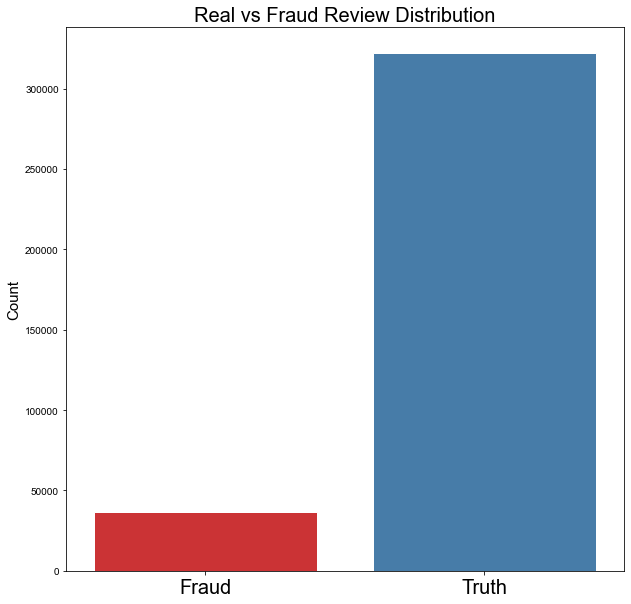

In [22]:
fig, ax = plt.subplots(figsize = (10,10))

sns.set(style='darkgrid')
color = sns.color_palette('Set1')
ax.grid (False)
ax = sns.countplot(x ='target', data = restaurants_df, palette = color)
plt.title('Real vs Fraud Review Distribution',size = 20)
plt.xlabel('')
plt.ylabel('Count', size = 15)
labels = ['Fraud','Truth']
plt.xticks([0,1],labels, size = 20);

##### How does each compare to the overall data? We take a closer look at each location and see the breakdown. By taking the average of our target value, we can determine the percentage of truthfulness which is why the target values were changed from -1 to 0. We isolate the count and combine it with the target review and rating to get a better picture.

In [23]:
target_ratio = restaurants_df.groupby('name')[['rating','target']].mean().sort_values(by = 'target',ascending = False)
target_ratio

,rating,target
name,,
10 Devoe,4.863636,1.000000
Sun Hing Lung Co,4.297297,1.000000
Khao Man Gai NY,4.466667,1.000000
Landhaus,4.652174,1.000000
Lunchbox Lic,4.650000,1.000000
...,...,...
The Gorbals,4.016129,0.709677
Chopping Block,4.603774,0.698113
Take Root,4.640000,0.680000


In [24]:
total_count = restaurants_df.groupby('name')['user_id'].count()
total_count.to_frame()

,user_id
name,
10 Devoe,22
100 Montaditos,213
983-Bushwick’s Living Room,184
99 Favor Taste,313
A Little Taste,23
...,...
Zoralie Restaurant,27
Zutto Japanese American Pub,608
ilili,1536


In [25]:
truth_breakdown_df = target_ratio.merge(total_count,
                         how = 'inner',
                         left_on = ['name'],
                         right_on = ['name']
                         )

In [26]:
truth_breakdown_df.sort_values(by = 'target', ascending = False).head(25)

,rating,target,user_id
name,,,
10 Devoe,4.863636,1.000000,22
Sun Hing Lung Co,4.297297,1.000000,37
Khao Man Gai NY,4.466667,1.000000,15
Landhaus,4.652174,1.000000,23
Lunchbox Lic,4.650000,1.000000,20
Brooklyn Proper,3.964286,1.000000,28
The Simone,4.619048,1.000000,21
Animals Food and Drink,4.818182,1.000000,11
Contrada Restaurant,4.239130,1.000000,46


In [27]:
truth_breakdown_df.sort_values(by ='target', ascending = True).head(25)

,rating,target,user_id
name,,,
The Wheelhouse Brooklyn,4.490909,0.345455,55
Anthony and Son Panini Shoppe,4.673469,0.653061,49
Take Root,4.640000,0.680000,25
Chopping Block,4.603774,0.698113,53
The Gorbals,4.016129,0.709677,62
Savor Brooklyn,4.042553,0.723404,47
Dig Inn Seasonal Market,4.575000,0.725000,40
Manhattan Proper,3.631902,0.730061,163
Rao’s,4.299065,0.738318,107


Next we want to take a look at how the rating is distributed in the dataset. We see that that the fraud dataset has far more 5 stars compared to the truths.

In [28]:
rating_distribution_df = restaurants_df.groupby(['target','rating'])['review'].count().to_frame()
rating_distribution_df

review
target rating        
0      1.0       3566
       2.0       2391
       3.0       3167
       4.0      10732
       5.0      17004
1      1.0      10656
       2.0      18383
       3.0      44464
       4.0     124470
       5.0     124124

In [29]:
false_dist_df = rating_distribution_df.iloc[:5,0].to_frame()

In [30]:
false_dist_df['review']

target  rating
0       1.0        3566
        2.0        2391
        3.0        3167
        4.0       10732
        5.0       17004
Name: review, dtype: int64

In [31]:
truth_dist_df = rating_distribution_df.iloc[5:,0].to_frame()
truth_dist_df

review
target rating        
1      1.0      10656
       2.0      18383
       3.0      44464
       4.0     124470
       5.0     124124

In [32]:
#Percentage of 5 stars in the truth and fraud sets.
false_5_star = false_dist_df['review'][0][5]/false_dist_df['review'][0].sum()
true_5_star = truth_dist_df['review'][1][5]/truth_dist_df['review'][1].sum()

print(f'{false_5_star.round(2)*100}% of the fraud reviews contain 5 star reviews')
print(f'{true_5_star.round(2)*100}% of the true reviews contain 5 star reviews')

46.0% of the fraud reviews contain 5 star reviews
39.0% of the true reviews contain 5 star reviews


In [33]:
#
# WRITE PY FILE
#
#
#function to plot a sns graph given a list for the x and a set y value

def sns_barplot(x,y=None,df=None,start = 1,grid = True, title = None, x_label = None, y_label = None,color_set ='Set1'):
    len(x)
    fig, ax = plt.subplots(figsize = (10,10))
    sns.set(style='darkgrid')
    
    color = sns.color_palette(color_set)
    
    ax.grid (grid)
    
    
    if df == None and type(x) is list:
        ax = sns.barplot(x = x, y = y, palette = color)
    #elif y == None:
    #    pass
    plt.title(title,size = 20)
    plt.xlabel(x_label, size = 15)
    plt.ylabel(y_label, size = 15)
    i = 0
    labels = []
    count = []
    
    while i < len(x):
        labels.append(i+start)
        count.append(0+i)
        i+=1
    
    plt.xticks(count,labels, size = 15);

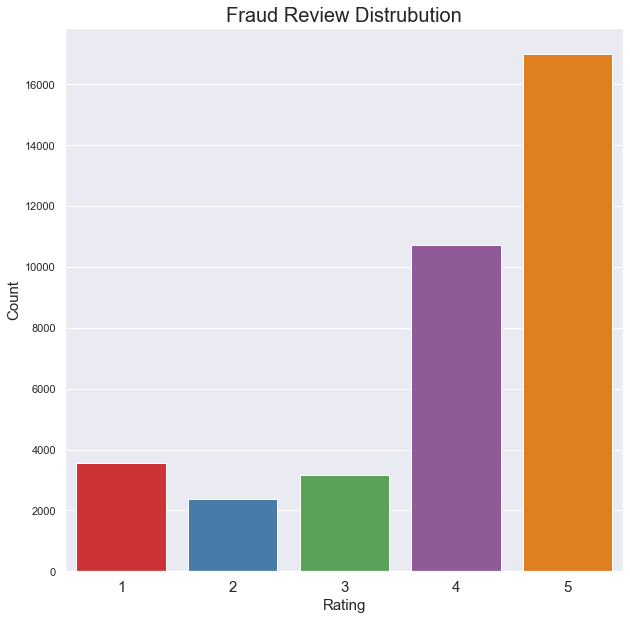

In [34]:
x_f = [1,2,3,4,5]
sns_barplot(x_f, 
            y = false_dist_df['review'], 
            title ='Fraud Review Distrubution',
            x_label = 'Rating',
            y_label = "Count",
            color_set = 'Set1'
           )
            

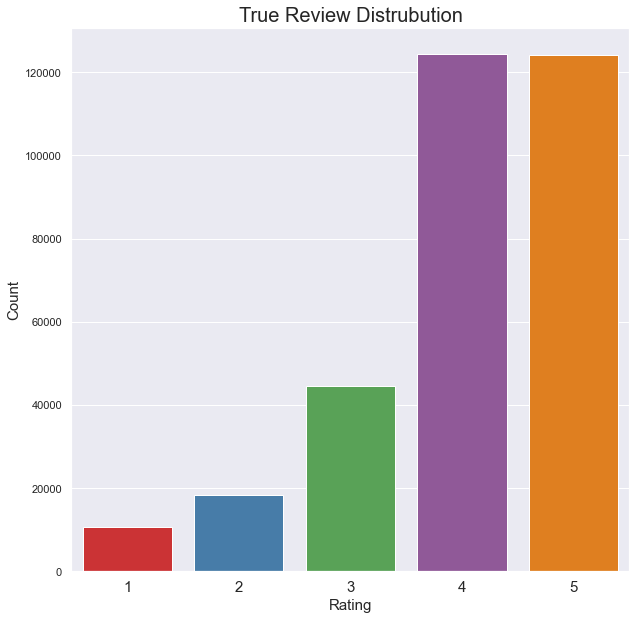

In [35]:
x_t = [1,2,3,4,5]
sns_barplot(x = x_t,
            y = truth_dist_df['review'], 
            title ='True Review Distrubution',
            x_label = 'Rating',
            y_label = "Count"
           )

In [36]:
restaurants_w_year = restaurants_df.copy()

In [37]:
restaurants_w_year['rev_year']= restaurants_w_year["date"].astype(str).str[0:4]

In [38]:
restaurants_w_year['rev_year'] = restaurants_w_year["rev_year"].astype(int)
false_year_dist = restaurants_w_year.groupby(['target', 'rev_year'])['review'].count().to_frame().iloc[:11,0]
false_year_dist.to_frame()

review
target rev_year        
0      2005          35
       2006         101
       2007         246
       2008         750
       2009        1968
       2010        3303
       2011        5561
       2012        6148
       2013        8178
       2014       10404
       2015         166

In [39]:
restaurants_w_year['rev_year'] = restaurants_w_year["rev_year"].astype(int)
true_year_dist = restaurants_w_year.groupby(['target', 'rev_year'])['review'].count().to_frame().iloc[11:,0]
true_year_dist.to_frame()

review
target rev_year        
1      2004           3
       2005         267
       2006        1582
       2007        4822
       2008        9986
       2009       18204
       2010       30173
       2011       42372
       2012       49582
       2013       67663
       2014       95066
       2015        2377

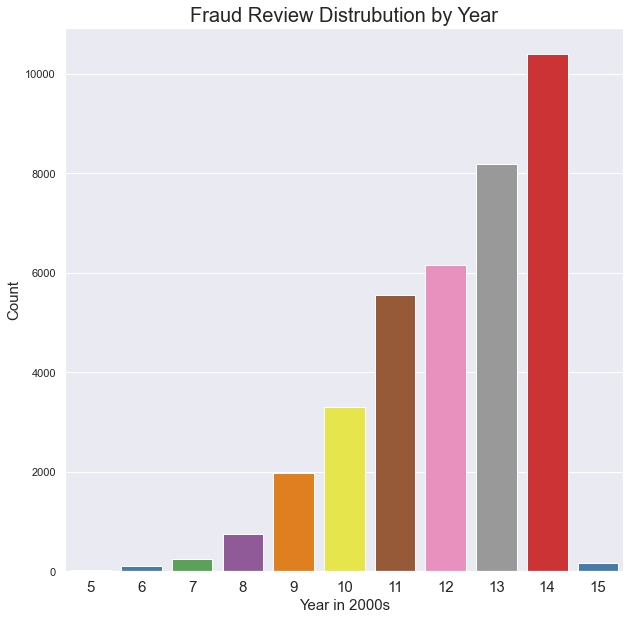

In [40]:
x_t = ['05','06','07','08','09','10','11','12','13','14','15']
sns_barplot(x = x_t,
            y = false_year_dist.to_frame()['review'], 
            title ='Fraud Review Distrubution by Year',
            x_label = 'Year in 2000s',
            y_label = "Count",
            start = 5
           )

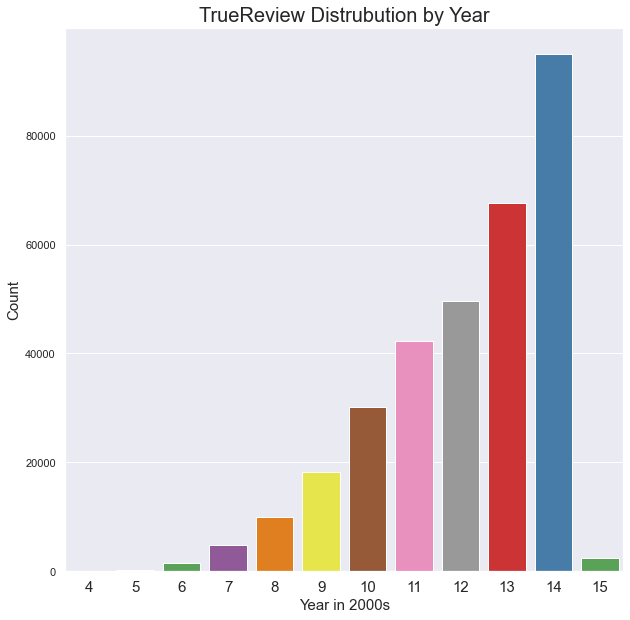

In [41]:
x_t = ['04','05','06','07','08','09','10','11','12','13','14','15']
sns_barplot(x = x_t,
            y = true_year_dist.to_frame()['review'], 
            title ='TrueReview Distrubution by Year',
            x_label = 'Year in 2000s',
            y_label = "Count",
            start = 4
           )

##### We create a new cloned databased for further analysis to keep the original dataframes.

In [42]:
clone_df = restaurants_df.copy()

##### We take a look at what we have in the reviews.

In [43]:
clone_df['review'].iloc[1]

"This little place in Soho is wonderful. I had a lamb sandwich and a glass of wine. The price shocked me for how small the serving was, but then again, this is Soho. The staff can be a little snotty and rude, but the food is great, just don't expect world-class service."

In [44]:
clone_df.head()

,user_id,prod_id,rating,target,date,review,name
0,923,0,3.0,0,2014-12-08,The food at snack is a selection of popular Gr...,Snack
1,924,0,3.0,0,2013-05-16,This little place in Soho is wonderful. I had ...,Snack
2,925,0,4.0,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,Snack
3,926,0,4.0,0,2011-07-28,This is a beautiful quaint little restaurant o...,Snack
4,927,0,4.0,0,2010-11-01,Snack is great place for a casual sit down lu...,Snack


##### There are reviews with only few words and letters which would be difficult to differentiate. Anything under 15 letters will be removed to be conservative. According to this <a href="https://strainindex.wordpress.com/2008/07/28/the-average-sentence-length/">study</a> an average sentence contains 15-20 characters which is where the parameters was set upon.

In [45]:
indexNames = []
sub_5_reviews = []
#enumerate through the cloned_df reviews and find any reviews with less than 5 words
#this is important as there were reviews with simply characters and one words.
for i,rev in enumerate(clone_df['review']):
    if len(rev)<15:
        indexNames.append(i)
        sub_5_reviews.append(rev)

In [46]:
#check for the percentage of data that will be affected
i_len = len(indexNames)
r_len = len(restaurants_df)


print("Percentage Removed:",((i_len/r_len)*100))

Percentage Removed: 0.40784829380677906


In [47]:
#convert the list into a dataframe for easier analysis
sub_5_df = pd.DataFrame(sub_5_reviews, columns = ['review'])

In [48]:
sub_5_df

,review
0,Very good food
1,I am a fan!
2,it was great
3,-
4,Good food
...,...
1459,Great Food!!!
1460,Good.
1461,awesome !
1462,best bbq EVER!


In [49]:
sub_5_df['review'].sort_values(ascending = False).head(20)

1335     レビューを書き始める...
955           zomg yes
594      zizi rocks!!!
281             yummy.
118           yummy!!1
554          yummy!!!!
534             yummy!
125             yummy!
389             yummy!
952      yummy seafood
31      yummy place!!!
758        yummy pizza
1109        yummy food
1345      yummy burger
765              yummy
463              yummy
859              yummy
1371          yummmmmm
484        yummm balls
150        yumm, vegan
Name: review, dtype: object

In [50]:
sub_5_df['review'].sort_values(ascending = True).head(20)

1056                !
405                 !
995     #fuckingsolid
3                   -
993                 -
1317                -
1204                .
253                 .
1124                .
295                 .
55                  .
1067                .
1436                .
333                 .
717                 .
356                 .
164                 .
375                 .
981                 .
1367                .
Name: review, dtype: object

##### We took a look at some the reviews removed. It is apparent that one word or a symbol is not enough to determine if a review is truthful or not. There are 1367 reviews removed and 1002 of them had unique comments.

In [51]:
sub_5_df['review'].unique()

array(['Very good food', 'I am a fan!', 'it was great', ..., 'Great meze',
       'best bbq EVER!', 'Yummy Mojitos'], dtype=object)

In [52]:
len(sub_5_df['review'].unique())

1002

In [53]:
len(clone_df['review'])

358957

In [54]:
clone_df2 = clone_df.drop(indexNames)

In [55]:
clone_df2.head()

,user_id,prod_id,rating,target,date,review,name
0,923,0,3.0,0,2014-12-08,The food at snack is a selection of popular Gr...,Snack
1,924,0,3.0,0,2013-05-16,This little place in Soho is wonderful. I had ...,Snack
2,925,0,4.0,0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,Snack
3,926,0,4.0,0,2011-07-28,This is a beautiful quaint little restaurant o...,Snack
4,927,0,4.0,0,2010-11-01,Snack is great place for a casual sit down lu...,Snack


##### We take another look at the distribution and that the data has been skewed even more ever-so-slightly.

In [56]:
restaurants_df['target'].value_counts(normalize = True)

1    0.897314
0    0.102686
Name: target, dtype: float64

In [57]:
clone_df2['target'].value_counts(normalize = True)

1    0.898225
0    0.101775
Name: target, dtype: float64

##### Since there is a good amount of data, we want to split a portion of it and leave it untouched. A random state has been set to keep the code consistent and stratify was used keep the imbalance in both the data. The data that will be uesd is X_data and y_data and the untouched data is named as such.

In [58]:
#seperate the target
X_split = clone_df2.drop('target',axis = 1)
y_split = clone_df2['target']
X_data, X_untouched, y_data, y_untouched = train_test_split(X_split,
                                                            y_split, 
                                                            test_size = 0.2, 
                                                            random_state = 42,
                                                            stratify = y_split)

In [59]:
#Code to export file

# X_data.to_csv('restaurant_data')
# y_data.to_csv('target_data')
# X_untouched.to_csv('untouched_data')
# y_untouched.to_csv('untouched_target')

##### We want to make sure the distribution was properly split and we can confirm that by checking the taget value for the two seperate datasets.

In [60]:
print('Main File')
print(y_data.to_frame().value_counts(normalize = True))
print('\n','Untouched data')
print(y_untouched.to_frame().value_counts(normalize = True))

Main File
target
1         0.898225
0         0.101775
dtype: float64

 Untouched data
target
1         0.898222
0         0.101778
dtype: float64
